In [4]:
using Pkg
Pkg.add("StaticArrays")
Pkg.add("LinearAlgebra")
Pkg.add("Combinatorics")
Pkg.add("Ripserer")
Pkg.add("Plots")
Pkg.add("Random")
Pkg.add("MultivariateStats")
Pkg.add("MLDatasets")
using StaticArrays
using LinearAlgebra
using Combinatorics
using Ripserer
using Plots
using Random
using MultivariateStats
using MLDatasets


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Chan

In [157]:
SPoint = SVector{2, Float64}
function circle_distance(x::Float64, y::Float64)::Float64
    real_distance::Float64 = abs(x - y)
    return minimum([real_distance, 2 - real_distance])
end

function torus_distance(x::SPoint, y::SPoint)::Float64
    first_circle_distance::Float64 = circle_distance(x[1], y[1])
    second_circle_distance::Float64 = circle_distance(x[2], y[2])
    return norm([first_circle_distance, second_circle_distance])
end

function matrix_index(indexies:: Tuple{Int64, Int64};matrix_size::Tuple{Int64, Int64}):: Int64
    i:: Int64, j:: Int64 = indexies
    row:: Int64, column:: Int64 = matrix_size
    index:: Int64 = (j - 1) * row + i
    if (i > row) || (j > column)
        throw(DomainError(index, "Make sure that each index <= row , column"))
    end
    return index
end

function distance_matrix(pointcloud:: Vector{SPoint}):: Array{Float64, 2}
    point_num:: Int64 = size(pointcloud, 1)
    indexcombs::Base.Generator{Combinatorics.Combinations,Combinatorics.var"#10#13"{Combinatorics.var"#reorder#11"{UnitRange{Int64}}}} = combinations(1:point_num, 2)
    dist_matrix:: Array{Float64, 2} = zeros(point_num, point_num)
    for indexies = indexcombs
        i::Int64, j:: Int64 = reverse(Tuple(indexies))
        #dist_matrix[matrix_index((i, j), matrix_size=(point_num, point_num))] = torus_distance(pointcloud[i], pointcloud[j])
        dist_matrix[i,j] = torus_distance(pointcloud[i], pointcloud[j])
    end
    #return map(points:: Vector{SPoint}-> distance_in_klein_bottle(points[1], points[2])::Float64, combs)
    return dist_matrix + transpose(dist_matrix)
end


distance_matrix (generic function with 1 method)

In [126]:
function staticalize(ndarray:: Union{Array{Float64, 2}, Matrix{Float64}})::Vector{SPoint}
    rownum ::Int = size(ndarray, 1)
    return [SPoint(ndarray[i,:]) for i = 1:rownum]
end

function uniformpoints_in_square(;range_min:: Float64, range_max:: Float64, sampling:: Int64, step:: Float64 = 0.00001)::Array{Float64,}
    rng = range_min:step:range_max
    dim:: Int64 = 2
    return rand(rng, (sampling, dim))
end


uniformpoints_in_square (generic function with 1 method)

In [153]:
pointcloud = uniformpoints_in_square(;range_min=-1.0, range_max=1.0, sampling=500)
staticpointcloud = staticalize(pointcloud)

500-element Vector{SVector{2, Float64}}:
 [-0.38005, 0.65135]
 [0.66784, 0.26702]
 [-0.49556, -0.17808]
 [0.37023, 0.85278]
 [-0.83545, -0.31821]
 [-0.15085, -0.86994]
 [0.55969, 0.00095]
 [0.44355, -0.74103]
 [0.88971, 0.53067]
 [-0.29975, 0.65828]
 [0.09895, 0.36525]
 [0.76249, -0.17067]
 [0.2906, -0.91595]
 ⋮
 [-0.20904, 0.3623]
 [-0.59455, 0.83485]
 [0.38343, 0.52794]
 [0.33579, -0.2213]
 [-0.89078, -0.40129]
 [0.35132, -0.26934]
 [-0.62455, -0.41921]
 [0.79851, 0.0492]
 [0.13089, 0.61765]
 [-0.83351, 0.01476]
 [-0.38577, 0.21096]
 [0.54953, 0.05923]

In [158]:
distmat = distance_matrix(staticpointcloud)

500×500 Matrix{Float64}:
 0.0        1.02675   0.837435  0.776849  …  0.781584  0.440427  1.10215
 1.02675    0.0       0.947636  0.657029     0.558826  0.948049  0.239111
 0.837435   0.947636  0.0       1.29955      0.389098  0.404235  0.983956
 0.776849   0.657029  1.29955   0.0          1.15599   0.9917    0.813554
 1.07118    0.767603  0.367643  1.14813      0.332976  0.69443   0.721603
 0.53075    1.18958   0.772978  0.590261  …  1.11746   0.948648  1.16357
 1.14286    0.28721   0.961563  0.872645     0.606957  0.968503  0.059159
 1.02348    1.01699   1.09492   0.412754     1.04588   1.26256   0.807247
 0.740145   0.344583  0.9382    0.61124      0.585466  0.791924  0.581359
 0.0805985  1.0437    0.858976  0.697641     0.836073  0.455516  1.0393
 0.557937   0.577308  0.805388  0.557923  …  0.996155  0.508683  0.544675
 1.18784    0.447807  0.741987  1.05239      0.444523  0.933329  0.313378
 0.798123   0.899916  1.07819   0.244595     1.27805   1.10443   1.00897
 ⋮                

In [156]:
distmat = distance_matrix(staticpointcloud)

500×500 Matrix{Float64}:
 0.0        1.02675   0.837435  0.776849  …  0.781584  0.440427  1.10215
 1.02675    0.0       0.947636  0.657029     0.558826  0.948049  0.239111
 0.837435   0.947636  0.0       1.29955      0.389098  0.404235  0.983956
 0.776849   0.657029  1.29955   0.0          1.15599   0.9917    0.813554
 1.07118    0.767603  0.367643  1.14813      0.332976  0.69443   0.721603
 0.53075    1.18958   0.772978  0.590261  …  1.11746   0.948648  1.16357
 1.14286    0.28721   0.961563  0.872645     0.606957  0.968503  0.059159
 1.02348    1.01699   1.09492   0.412754     1.04588   1.26256   0.807247
 0.740145   0.344583  0.9382    0.61124      0.585466  0.791924  0.581359
 0.0805985  1.0437    0.858976  0.697641     0.836073  0.455516  1.0393
 0.557937   0.577308  0.805388  0.557923  …  0.996155  0.508683  0.544675
 1.18784    0.447807  0.741987  1.05239      0.444523  0.933329  0.313378
 0.798123   0.899916  1.07819   0.244595     1.27805   1.10443   1.00897
 ⋮                

In [67]:
torus_vrip_fill = Rips(distmat; threshold=nothing)
torus_vrips_co = ripserer(torus_vrip_fill; dim_max=2, reps=true)

3-element Vector{PersistenceDiagrams.PersistenceDiagram}:
 500-element 0-dimensional PersistenceDiagram
 141-element 1-dimensional PersistenceDiagram
 130-element 2-dimensional PersistenceDiagram

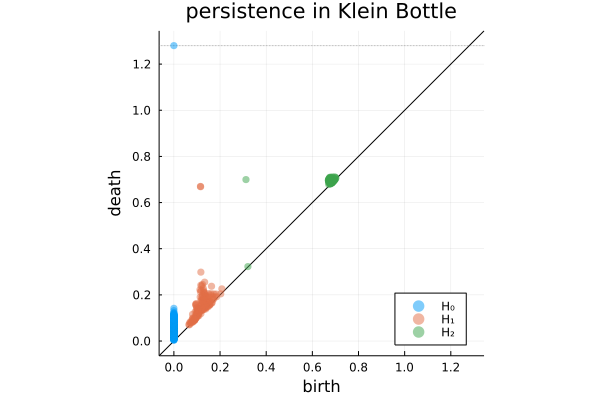

In [68]:
plot(torus_vrips_co; title="persistence in Klein Bottle")

In [175]:
function plotting_cycle(;pointcloud, cohomology, legend=nothing)
    filtration = cohomology[2].filtration
    most_persistent_co = cohomology[2][end]
    reconstructed_at_birth_most = reconstruct_cycle(filtration, most_persistent_co)
    second_persistent_co = cohomology[2][end - 1]
    reconstructed_at_birth_second = reconstruct_cycle(filtration, second_persistent_co)
    common_cycle = intersect(reconstructed_at_birth_most, reconstructed_at_birth_second)
    println(common_cycle)
    num_point = size(pointcloud, 1)
    x = pointcloud[1:num_point]
    y = pointcloud[num_point + 1:end]
    scatter(x,y; label="data", markersize=2, legend = legend)
    plot!(reconstructed_at_birth_most, x, y; label="most_persistent", color="blue")
    plot!(reconstructed_at_birth_second, x, y; label="second_persistent", color="red")
    if !isempty(common_cycle)
        plot!(common_cycle, x, y; label="intersect", color="green")
    end
    plot!()
end

plotting_cycle (generic function with 1 method)

Simplex{1, Float64, Int64}[+Simplex{1}((181, 167), 0.10914312438261974), +Simplex{1}((181, 60), 0.11280660131393021), +Simplex{1}((488, 60), 0.08786611292187675), +Simplex{1}((62, 32), 0.0888300951254698), +Simplex{1}((383, 32), 0.06764682993311653), +Simplex{1}((383, 341), 0.09853475782687045), +Simplex{1}((342, 341), 0.11420960773945418), +Simplex{1}((430, 342), 0.1085066679978701), +Simplex{1}((430, 373), 0.1041700235192447), +Simplex{1}((373, 346), 0.08955373638212982), +Simplex{1}((346, 18), 0.05362923922637718), +Simplex{1}((92, 18), 0.08686412838450641), +Simplex{1}((382, 92), 0.04606676133613038), +Simplex{1}((382, 296), 0.11040399675736381), +Simplex{1}((296, 88), 0.06620573540109652)]


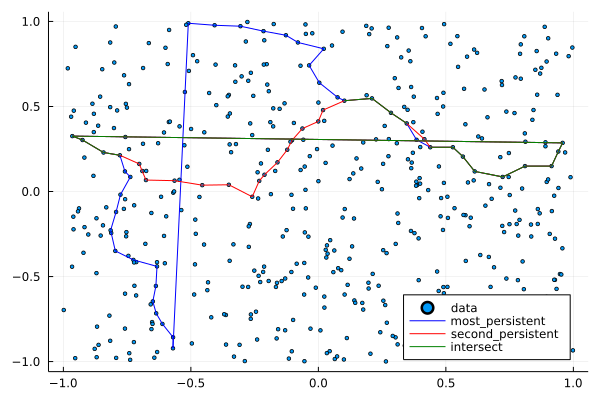

In [76]:
plotting_cycle(;pointcloud = pointcloud, cohomology=torus_vrips_co, legend= :bottomright)

In [147]:
function randn_poitns(;num_point:: Int64, dim:: Int64=2)::Array{Float64, 2}
    rng = MersenneTwister()
    randompoints = randn(rng, (num_point, dim))
    max_range = maximum(map(point -> norm(point), randompoints))
    randompoints = randompoints / max_range
end

randn_poitns (generic function with 1 method)

In [148]:
pointcloud=randn_poitns(;num_point=500)
staticpointcloud=staticalize(pointcloud)

500-element Vector{SVector{2, Float64}}:
 [0.27681736192707784, 0.3093915257122809]
 [0.07736242492765284, 0.2574696237821539]
 [-0.04396298221558089, 0.5763962563137028]
 [0.17049580759790414, -0.24470976180514806]
 [0.06695754959275992, -0.2499576445496818]
 [-0.26995719699534615, 0.1741471225465575]
 [0.014680133686386616, -0.16177259161318977]
 [0.006280638538177162, -0.2841738615806726]
 [0.13339362167760194, 0.11996177434496998]
 [0.19956405051391757, 0.556866664677511]
 [0.3914128573473381, 0.43522147180200493]
 [-0.007244154702824806, 0.2523070637704133]
 [0.030714863827092084, 0.027432506379905755]
 ⋮
 [0.17605923335143847, -0.45748804004066673]
 [-0.4891212296783489, 0.18871116094164578]
 [-0.2881515910323708, 0.5442533189172865]
 [-0.3796354804793549, 0.5317146737844792]
 [-0.12639545795710483, 0.03540158658793008]
 [-0.08096221221290817, 0.13871207229506433]
 [0.14227325463241045, -0.11314029922694668]
 [-0.05817446898492156, -0.38028723270006526]
 [-0.14457480863151395, -0

In [149]:
distmat = distance_matrix(staticpointcloud)

500×500 Matrix{Float64}:
 0.0       0.206102   0.417363  0.56421   …  0.263435  0.863796  0.776633
 0.206102  0.0        0.341224  0.510743     0.220101  0.658279  0.703821
 0.417363  0.341224   0.0       0.84865      0.153929  0.734604  0.987599
 0.56421   0.510743   0.84865   0.0          0.728669  0.767235  0.214445
 0.597422  0.507534   0.833765  0.103671     0.727538  0.674245  0.198379
 0.563253  0.357174   0.461387  0.607816  …  0.458671  0.305417  0.720539
 0.539177  0.423902   0.740495  0.176514     0.642068  0.592174  0.295926
 0.652311  0.546288   0.862036  0.168891     0.764727  0.636472  0.185482
 0.237601  0.148485   0.489681  0.366554     0.362478  0.681439  0.567229
 0.259253  0.323376   0.244309  0.802103     0.148493  0.906279  1.00233
 0.170192  0.360865   0.457693  0.71492   …  0.32019   1.01562   0.929254
 0.289741  0.0847639  0.326163  0.527842     0.239454  0.577292  0.706094
 0.374256  0.234719   0.55402   0.305941     0.452193  0.573818  0.478102
 ⋮            

In [150]:
torus_vrip_fill = Rips(distmat; threshold=nothing)
torus_vrips_co = ripserer(torus_vrip_fill; dim_max=2, reps=true)


3-element Vector{PersistenceDiagrams.PersistenceDiagram}:
 500-element 0-dimensional PersistenceDiagram
 123-element 1-dimensional PersistenceDiagram
 9-element 2-dimensional PersistenceDiagram

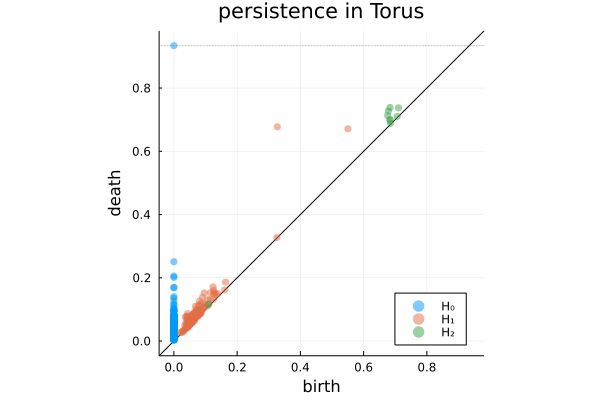

In [159]:
plot(torus_vrips_co; title="persistence in Torus")

Simplex{1, Float64, Int64}[]


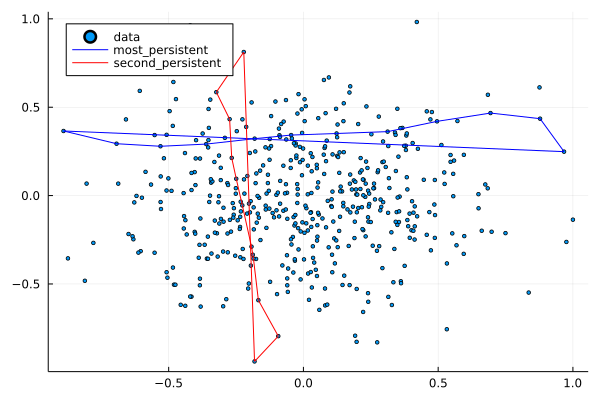

In [94]:
plotting_cycle(;pointcloud=pointcloud, cohomology=torus_vrips_co, legend=:topleft)

In [160]:
train_x, train_y = MNIST.traindata(Float64)

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [5, 0, 4, 1, 9, 2, 1, 3, 1, 4  …  9, 2, 9, 5, 1, 8, 3, 5, 6, 8])

In [161]:
test_image_x = train_x[:,:, 1]
findall(x->x>0, test_image_x)

166-element Vector{CartesianIndex{2}}:
 CartesianIndex(13, 6)
 CartesianIndex(14, 6)
 CartesianIndex(15, 6)
 CartesianIndex(16, 6)
 CartesianIndex(17, 6)
 CartesianIndex(18, 6)
 CartesianIndex(19, 6)
 CartesianIndex(20, 6)
 CartesianIndex(21, 6)
 CartesianIndex(22, 6)
 CartesianIndex(23, 6)
 CartesianIndex(24, 6)
 CartesianIndex(9, 7)
 ⋮
 CartesianIndex(11, 24)
 CartesianIndex(12, 24)
 CartesianIndex(13, 24)
 CartesianIndex(14, 24)
 CartesianIndex(5, 25)
 CartesianIndex(6, 25)
 CartesianIndex(7, 25)
 CartesianIndex(8, 25)
 CartesianIndex(9, 25)
 CartesianIndex(10, 25)
 CartesianIndex(11, 25)
 CartesianIndex(12, 25)

In [162]:
function mnist_index_to_codinate(index ::Tuple{Int64,Int64})::Tuple{Float64, Float64}
    x, y = index
    return (2.0 * x - 29.0)/27.0, (- 2.0 * y + 29.0)/27.0
end

mnist_index_to_codinate (generic function with 1 method)

In [163]:
function tuple_list_to_Array(tuple_list::Vector{Tuple{Float64, Float64, Float64}})::Matrix{Float64}
    len::Int64 = length(tuple_list)
    dim::Int64 = length(tuple_list[1])
    result::Matrix{Float64} = zeros(len, dim)
    for i=1:dim
        result[len * (i - 1) + 1 : len * i] = map(tuple-> tuple[i], tuple_list)
    end
    return result
end


tuple_list_to_Array (generic function with 1 method)

In [192]:
function mnist_image_to_pointcloud(image ::Matrix{Float64})
    indexies = map(x-> Tuple(x), findall(x->x>0, image))
    result = map(indexies) do index
        x, y= mnist_index_to_codinate(index)
        z = image[index[1], index[2]]
        return x, y, z
    end
    return tuple_list_to_Array(result)
end

mnist_image_to_pointcloud (generic function with 1 method)

In [165]:
test_image_x

28×28 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.215686  0.533333   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.67451   0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.886275  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.831373   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.529412   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.992157  0.517647   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.956863  0.0627451  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0117647     0.521569  0.0        0.0  0.0  0.0
 ⋮

In [166]:
pointcloud = mnist_image_to_pointcloud(test_image_x)

Tuple{Int64, Int64}


166×3 Matrix{Float64}:
 -0.111111   0.62963   0.0117647
 -0.037037   0.62963   0.0705882
  0.037037   0.62963   0.0705882
  0.111111   0.62963   0.0705882
  0.185185   0.62963   0.494118
  0.259259   0.62963   0.533333
  0.333333   0.62963   0.686275
  0.407407   0.62963   0.101961
  0.481481   0.62963   0.65098
  0.555556   0.62963   1.0
  0.62963    0.62963   0.968627
  0.703704   0.62963   0.498039
 -0.407407   0.555556  0.117647
  ⋮                    
 -0.259259  -0.703704  0.992157
 -0.185185  -0.703704  0.956863
 -0.111111  -0.703704  0.521569
 -0.037037  -0.703704  0.0431373
 -0.703704  -0.777778  0.533333
 -0.62963   -0.777778  0.992157
 -0.555556  -0.777778  0.992157
 -0.481481  -0.777778  0.992157
 -0.407407  -0.777778  0.831373
 -0.333333  -0.777778  0.529412
 -0.259259  -0.777778  0.517647
 -0.185185  -0.777778  0.0627451

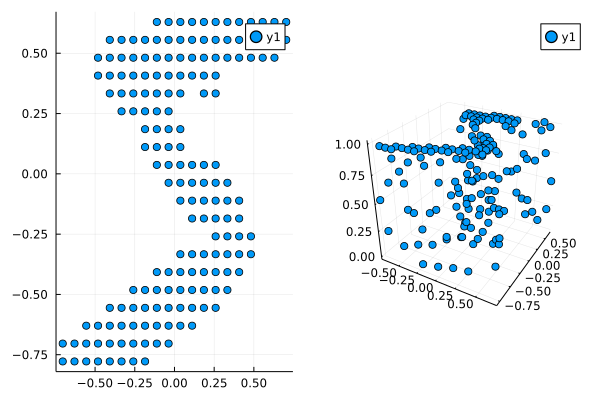

In [167]:
x = pointcloud[1:166]
y = pointcloud[167:166*2]
z = pointcloud[166*2+1:end]
plot(scatter(x, y), scatter(x, y, z))

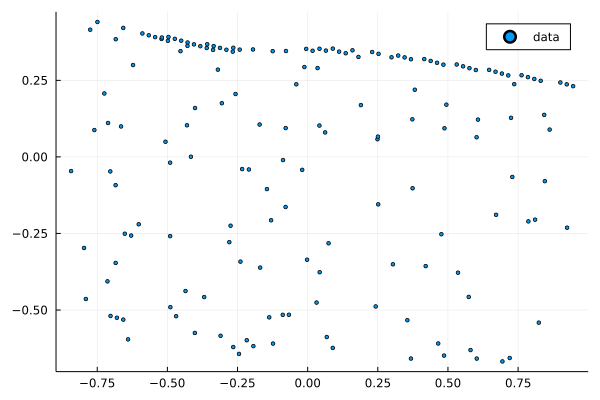

In [168]:
M = fit(PCA, transpose(pointcloud);maxoutdim=2)
x = Matrix(pointcloud)'
pointcloud_pca = transpose(predict(M, x))
num_point = size(pointcloud_pca, 1)
x = pointcloud_pca[1:num_point]
y =pointcloud_pca[num_point + 1: end]
scatter(x,y; label="data", markersize=2)

In [169]:
staticpointcloud = staticalize(Matrix(pointcloud_pca))
distmat = distance_matrix(staticpointcloud)

166×166 Matrix{Float64}:
 0.0        0.066697   0.0809467  …  0.674129   0.690528   0.642627
 0.066697   0.0        0.0235111     0.624308   0.641917   0.635181
 0.0809467  0.0235111  0.0           0.601825   0.619253   0.614176
 0.0988018  0.0470223  0.0235111     0.579424   0.596654   0.593359
 0.505417   0.439835   0.432993      0.517283   0.54181    0.820352
 0.552101   0.486184   0.47854    …  0.510851   0.535304   0.838801
 0.710067   0.644286   0.636762      0.572767   0.595868   0.954997
 0.19995    0.149355   0.126447      0.475625   0.492864   0.525905
 0.693917   0.627483   0.618185      0.519352   0.542337   0.907755
 0.969826   0.976213   0.968329      0.781202   0.799504   1.04714
 0.997987   0.954005   0.945476   …  0.745937   0.764092   1.05636
 0.585814   0.519459   0.506061      0.380772   0.404858   0.750492
 0.187215   0.188648   0.211109      0.786465   0.806187   0.822411
 ⋮                                ⋱                        ⋮
 1.0491     0.986643   0.968521 

In [172]:
torus_vrip_fill = Rips(distmat; threshold=nothing)
torus_vrips_co = ripserer(torus_vrip_fill; dim_max=2, reps=true)

3-element Vector{PersistenceDiagrams.PersistenceDiagram}:
 166-element 0-dimensional PersistenceDiagram
 31-element 1-dimensional PersistenceDiagram
 22-element 2-dimensional PersistenceDiagram

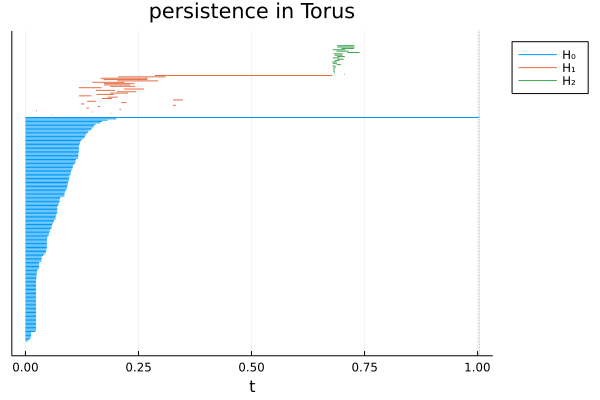

In [173]:
barcode(torus_vrips_co; title="persistence in Torus")

Simplex{1, Float64, Int64}[+Simplex{1}((157, 121), 0.20493272676254987)]


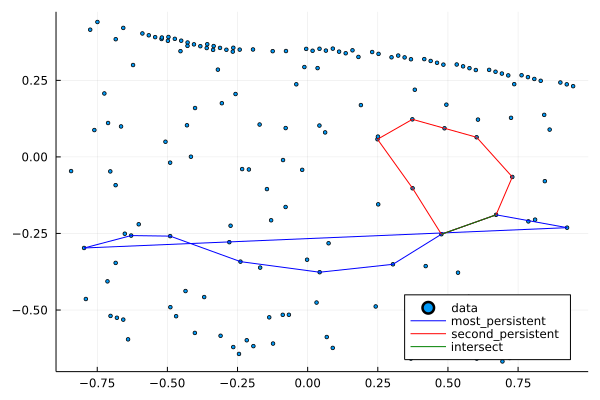

In [176]:
plotting_cycle(;pointcloud = Matrix(pointcloud_pca), cohomology=torus_vrips_co, legend= :bottomright)

In [183]:
train_x

28×28×60000 Array{Float64, 3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.215686  0.533333   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.67451   0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.886275  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.831373   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.529412   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.992157  0.517647   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.956863  0.0627451  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0117647     0.521569  0.0    

In [184]:
indexies_image_of_5 = findall(x-> x == 5, train_y)
image_of_5 = [train_x[:,:,i] for i=indexies_image_of_5]

5421-element Vector{Matrix{Float64}}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.

In [190]:
function MNIST_PCA_Torus(image_list)
    map(image_list) do image
        pointcloud = mnist_image_to_pointcloud(image)
        M = fit(PCA, transpose(pointcloud);maxoutdim=2)
        x = Matrix(pointcloud)'
        pointcloud_pca = transpose(predict(M, x))
        staticpointcloud = staticalize(Matrix(pointcloud_pca))
        distmat = distance_matrix(staticpointcloud)
        torus_vrip_fill = Rips(distmat; threshold=nothing)
        torus_vrips_co = ripserer(torus_vrip_fill; dim_max=2, reps=true)
    end
end

        

MNIST_PCA_Torus (generic function with 1 method)

In [194]:
chomologys = MNIST_PCA_Torus(image_of_5[1:300])

300-element Vector{Vector{PersistenceDiagrams.PersistenceDiagram}}:
 [166-element 0-dimensional PersistenceDiagram, 31-element 1-dimensional PersistenceDiagram, 22-element 2-dimensional PersistenceDiagram]
 [91-element 0-dimensional PersistenceDiagram, 19-element 1-dimensional PersistenceDiagram, 7-element 2-dimensional PersistenceDiagram]
 [98-element 0-dimensional PersistenceDiagram, 22-element 1-dimensional PersistenceDiagram, 9-element 2-dimensional PersistenceDiagram]
 [111-element 0-dimensional PersistenceDiagram, 15-element 1-dimensional PersistenceDiagram, 14-element 2-dimensional PersistenceDiagram]
 [103-element 0-dimensional PersistenceDiagram, 21-element 1-dimensional PersistenceDiagram, 12-element 2-dimensional PersistenceDiagram]
 [106-element 0-dimensional PersistenceDiagram, 17-element 1-dimensional PersistenceDiagram, 5-element 2-dimensional PersistenceDiagram]
 [102-element 0-dimensional PersistenceDiagram, 18-element 1-dimensional PersistenceDiagram, 8-element 2-dime

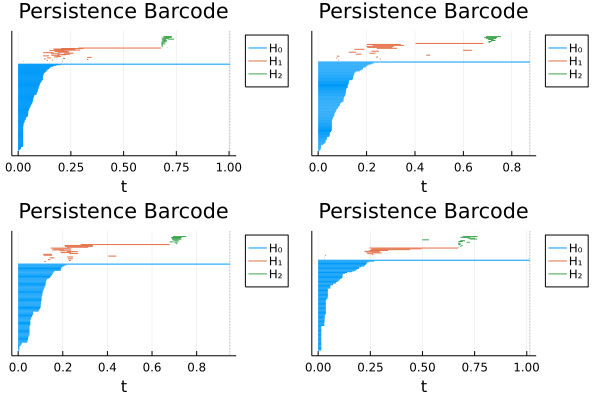

In [223]:
plot(barcode(chomologys[1]), barcode(chomologys[2]), barcode(chomologys[3]), barcode(chomologys[4]))
